In [1]:
# Install gdown
!pip install gdown

# Download the file from Google Drive
file_id = '1EqgSRkjtUMnUEGAOAX6onKWeO0Ax51G6'
!gdown --id {file_id} --output dataset.zip

# Unzip the downloaded file (if it is a zip file)
# !unzip dataset.zip -d ./dataset

  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/18/eb/fdb7eb9e48b7b02554e1664afd3bd3f117f6b6d6c5881438a0b055554f9b/tqdm-4.66.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
  Obtaining dependency information for PySocks!=1.5.7,>=1.5.6 from https://files.pythonhosted.org/packages/8d/59/b4572118e098ac8e46e399a1dd0f2d85403ce8bbaad9ec79373ed6badaf9/PySocks-1.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
Using cached PySocks-1.7


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1EqgSRkjtUMnUEGAOAX6onKWeO0Ax51G6
From (redirected): https://drive.google.com/uc?id=1EqgSRkjtUMnUEGAOAX6onKWeO0Ax51G6&confirm=t&uuid=7e1f785b-4ab0-41a3-a560-1564e20d319e
To: c:\Users\abdul\Desktop\diopsis\Detection\files\dataset.zip

  0%|          | 0.00/4.45G [00:00<?, ?B/s]
  0%|          | 524k/4.45G [00:00<35:26, 2.09MB/s]
  0%|          | 1.57M/4.45G [00:00<15:19, 4.84MB/s]
  0%|          | 3.67M/4.45G [00:00<07:36, 9.73MB/s]
  0%|          | 6.29M/4.45G [00:00<05:15, 14.1MB/s]
  0%|          | 8.39M/4.45G [00:00<06:28, 11.4MB/s]
  0%|         

In [3]:
import os
import zipfile

extract_path = './dataset/'

# Check if the zip file exists
if os.path.exists('dataset.zip'):
    # Extract the zip file
    with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("Extraction complete.")
else:
    print("Error: Zip file not found.")

Extraction complete.


In [5]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.2/38.8 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.4/38.8 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.7/38.8 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.6/38.8 MB 7.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/38.8 MB 12.3 MB/s eta 0:00:03
   ---- ----------------------------------- 4.3/38.8 MB 14.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.1/38.8 MB 14.9 MB/s eta 0:00:03
   ------ --------------------------------- 5.8/38.8 MB 14.9 MB/s eta 0:00:03
   ------ -


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import json
import cv2
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import argparse
# Paths to the image and annotation directories
image_dir = './dataset/public/images'
annotation_dir = './dataset/public/annotations'


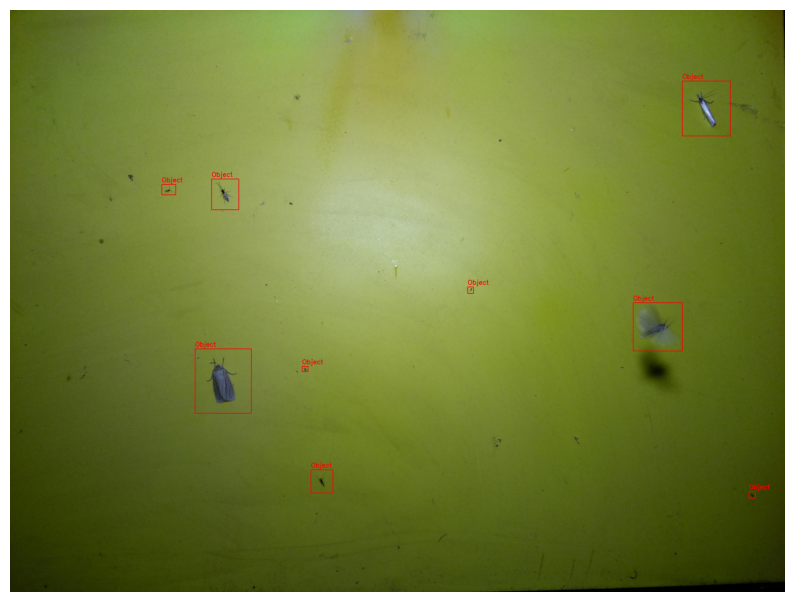

{
    "annotations": [
        {
            "labels": [
                {
                    "probability": 1.0,
                    "name": "Object",
                    "color": "#e1e7d9ff"
                }
            ],
            "shape": {
                "x": 853,
                "y": 718,
                "width": 115,
                "height": 130,
                "type": "RECTANGLE"
            }
        },
        {
            "labels": [
                {
                    "probability": 1.0,
                    "name": "Object",
                    "color": "#e1e7d9ff"
                }
            ],
            "shape": {
                "x": 2845,
                "y": 304,
                "width": 203,
                "height": 232,
                "type": "RECTANGLE"
            }
        },
        {
            "labels": [
                {
                    "probability": 1.0,
                    "name": "Object",
                    "color": "#e1e7d9ff"
   

In [2]:
# Paths to the image and annotation directories
image_dir = './dataset/public/images'
annotation_dir = './dataset/public/annotations'

# Function to plot image with bounding boxes
def plot_image_with_annotations(img_path, annotation_path, prediction=None):
    # Load the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Load the annotations
    with open(annotation_path) as f:
        data = json.load(f)
    
    # Draw bounding boxes and labels from ground truth
    for ann in data['annotations']:
        shape = ann['shape']
        x_min = shape['x']
        y_min = shape['y']
        x_max = x_min + shape['width']
        y_max = y_min + shape['height']
        label = ann['labels'][0]['name']  # Assuming only one label per annotation
        
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Draw bounding boxes from prediction if available
    if prediction is not None:
        h, w, _ = img.shape
        x_min_pred = int(prediction[0] * w)
        y_min_pred = int(prediction[1] * h)
        x_max_pred = int(prediction[2] * w)
        y_max_pred = int(prediction[3] * h)
        
        cv2.rectangle(img, (x_min_pred, y_min_pred), (x_max_pred, y_max_pred), (0, 255, 0), 2)
        cv2.putText(img, "Prediction", (x_min_pred, y_min_pred - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# List all images and annotations
image_files = os.listdir(image_dir)
annotation_files = os.listdir(annotation_dir)

# Example: Visualize the first image and its annotations
sample = image_files[3]
sample_image = os.path.join(image_dir, sample)
sample_annotation = os.path.join(annotation_dir, sample.replace('.jpg', '.json'))

plot_image_with_annotations(sample_image, sample_annotation)


with open(sample_annotation) as f:
        data = json.load(f)
        data = json.dumps(data, indent=4)
print(data)

In [3]:
# List of all image files
all_images = os.listdir(image_dir)

# Split into train, validation, and test sets
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)
train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Test set: {len(test_images)} images")

Training set: 1941 images
Validation set: 648 images
Test set: 648 images


In [4]:

class DataGenerator(Sequence):
    def __init__(self, image_files, image_dir, annotation_dir, batch_size=32, image_size=(224, 224)):
        self.image_files = image_files
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.batch_size = batch_size
        self.image_size = image_size
        self.indexes = np.arange(len(self.image_files))

    def __len__(self):
        return int(np.ceil(len(self.image_files) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_files = [self.image_files[i] for i in batch_indexes]
        return self.__data_generation(batch_image_files)

    def __data_generation(self, batch_image_files):
        X = []
        y = []

        for image_file in batch_image_files:
            image_path = os.path.join(self.image_dir, image_file)
            annotation_path = os.path.join(self.annotation_dir, image_file.replace('.jpg', '.json'))

            # Load and preprocess image
            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, self.image_size)
            X.append(img_resized)

            # Load and preprocess annotation
            with open(annotation_path, 'r') as f:
                annotation = json.load(f)

            if annotation['annotations']:
                bbox = annotation['annotations'][0]['shape']
                x_min = bbox['x']
                y_min = bbox['y']
                x_max = x_min + bbox['width']
                y_max = y_min + bbox['height']

                # Normalize bounding box coordinates
                h, w, _ = img.shape
                x_min /= w
                y_min /= h
                x_max /= w
                y_max /= h

                # Assuming "Object" is the only class, otherwise use proper label encoding
                y.append([x_min, y_min, x_max, y_max, 1.0])  # 1.0 for class probability
            else:
                # Handle the case where there are no annotations
                y.append([0, 0, 0, 0, 0])  # No object detected

        return np.array(X), np.array(y)


In [5]:
def build_model(input_shape):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False)
    x = base_model.output
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    outputs = Dense(5, activation='sigmoid')(x)  # 4 for bounding box, 1 for class probability

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

all_images = os.listdir(image_dir)
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)
train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Create data generators
batch_size = 32
train_generator = DataGenerator(train_images, image_dir, annotation_dir, batch_size=batch_size, image_size=(224, 224))
val_generator = DataGenerator(val_images, image_dir, annotation_dir, batch_size=batch_size, image_size=(224, 224))
test_generator = DataGenerator(test_images, image_dir, annotation_dir, batch_size=batch_size, image_size=(224, 224))

# Build and train the model
input_shape = (224, 224, 3)
model = build_model(input_shape)

checkpoint = ModelCheckpoint('model_weights.weights.h5', save_weights_only=True, save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

#model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=[checkpoint, early_stopping])


In [6]:
model.load_weights('model_weightsold.weights.h5')
test_loss, test_mae = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

21/21 [==============================] - 163s 8s/step - loss: 0.2611 - mae: 0.3923
Test Loss: 0.2611325681209564
Test MAE: 0.39232587814331055


In [7]:
model.load_weights('model_weights.weights.h5')
test_loss, test_mae = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

ValueError: Layer 'Conv1' expected 1 variables, but received 0 variables during loading. Expected: ['Conv1/kernel:0']

1/1 [==============================] - 1s 536ms/step


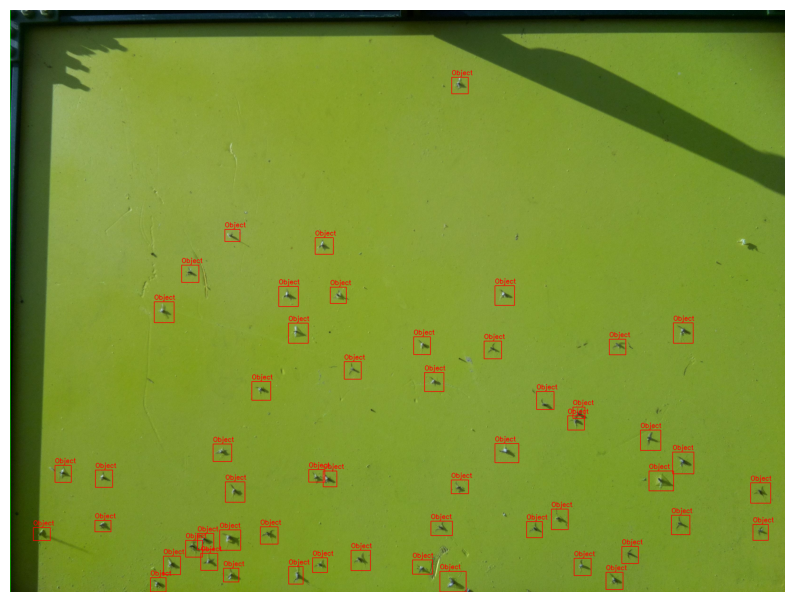

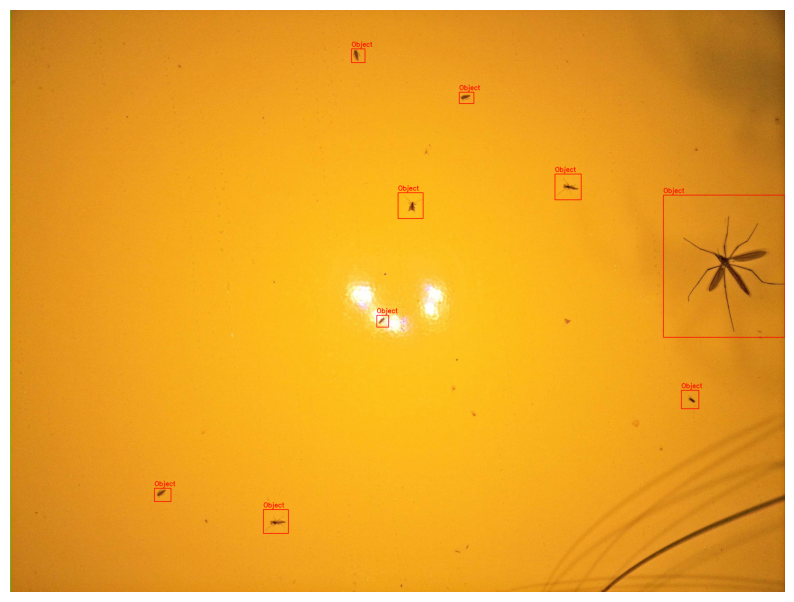

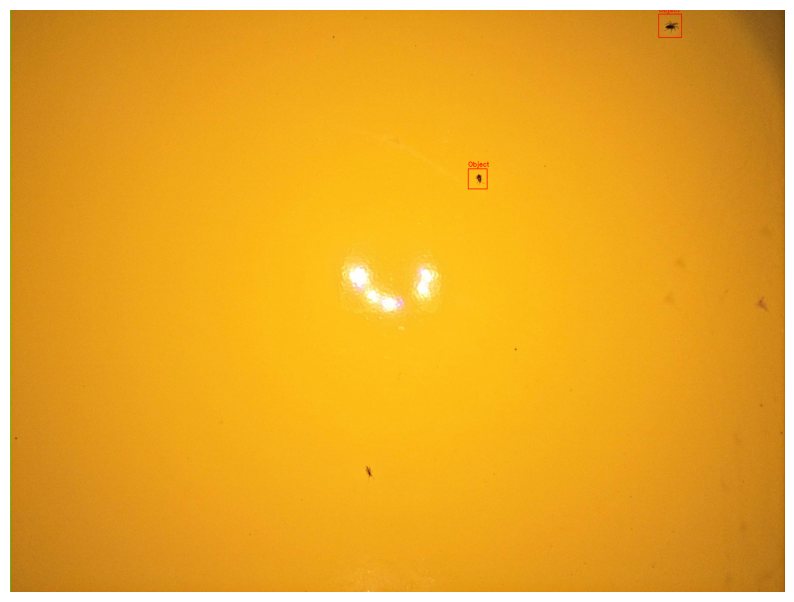

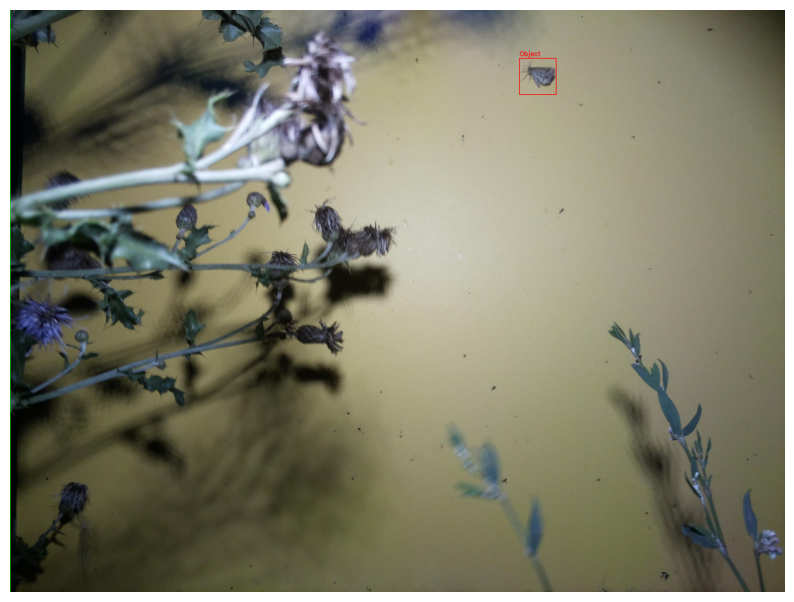

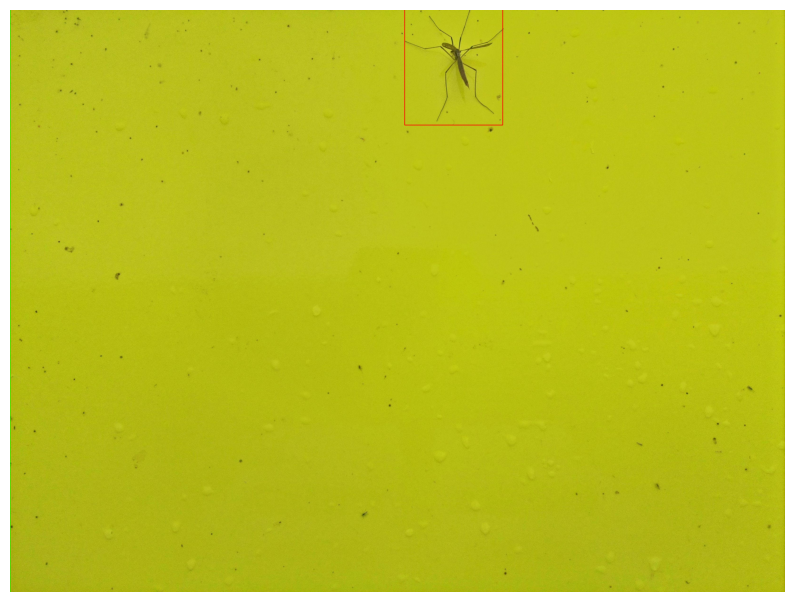

In [26]:
def visualize_predictions(model, test_generator, num_samples=5):
    total_samples_processed = 0
    
    for i in range(len(test_generator)):
        if total_samples_processed >= num_samples:
            break

        img_batch, _ = test_generator[i]
        predictions = model.predict(img_batch)

        for j in range(len(img_batch)):
            if total_samples_processed >= num_samples:
                break

            img = img_batch[j]
            prediction = predictions[j]

            # Denormalize the bounding box coordinates
            h, w, _ = img.shape
            x_min_pred = int(prediction[0] * w)
            y_min_pred = int(prediction[1] * h)
            x_max_pred = int(prediction[2] * w)
            y_max_pred = int(prediction[3] * h)

            # Load the original image path
            img_path = os.path.join(image_dir, test_generator.image_files[test_generator.indexes[i * test_generator.batch_size + j]])
            annotation_path = os.path.join(annotation_dir, test_generator.image_files[test_generator.indexes[i * test_generator.batch_size + j]].replace('.jpg', '.json'))

            # Plot the image with ground truth and predicted bounding boxes
            plot_image_with_annotations(img_path, annotation_path, prediction=[x_min_pred, y_min_pred, x_max_pred, y_max_pred])

            total_samples_processed += 1

# Visualize predictions on test data
visualize_predictions(model, test_generator, num_samples=5)
